In [1]:
!nvidia-smi

Mon Jun 12 11:20:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
import os
HOME = os.getcwd()
print(HOME)
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


In [5]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


# Download Video

In [6]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-06-12 11:25:32--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 74.125.135.102, 74.125.135.101, 74.125.135.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/be0iu7tq16dmeklomj3jurm4d873uuhe/1686569100000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=ff592ac0-2df0-46d8-92bb-df8623278f1d [following]
--2023-06-12 11:25:33--  https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/be0iu7tq16dmeklomj3jurm4d873uuhe/1686569100000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=ff592ac0-2df0-46d8-92bb-df8623278f1d
Resolving doc-0k-ag-docs.googleusercontent.com (doc-0k-ag-docs.googleusercontent.com)... 108.177.

In [7]:
MARKET_SQUARE_VIDEO_PATH = f"{HOME}/market-square.mp4"

In [8]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm" -O mall.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-06-12 11:25:40--  https://docs.google.com/uc?export=download&confirm=&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm
Resolving docs.google.com (docs.google.com)... 74.125.135.102, 74.125.135.101, 74.125.135.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/le08glijv33oafum11kqskkt3n4c7rcj/1686569100000/04309230031174164349/*/1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm?e=download&uuid=80ea4edf-674f-4da4-8893-a0f3ba5915c2 [following]
--2023-06-12 11:25:42--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/le08glijv33oafum11kqskkt3n4c7rcj/1686569100000/04309230031174164349/*/1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm?e=download&uuid=80ea4edf-674f-4da4-8893-a0f3ba5915c2
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 108.177.

In [9]:
MALL_VIDEO_PATH = f"{HOME}/mall.mp4"

In [10]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz" -O subway.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-06-12 11:25:44--  https://docs.google.com/uc?export=download&confirm=t&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz
Resolving docs.google.com (docs.google.com)... 74.125.135.102, 74.125.135.101, 74.125.135.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nnjgte17slis24nogpe07gggo3e4fgr6/1686569100000/04309230031174164349/*/1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz?e=download&uuid=242e11cb-9d36-4fc7-bec3-26dde6ce06d8 [following]
--2023-06-12 11:25:44--  https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nnjgte17slis24nogpe07gggo3e4fgr6/1686569100000/04309230031174164349/*/1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz?e=download&uuid=242e11cb-9d36-4fc7-bec3-26dde6ce06d8
Resolving doc-00-ag-docs.googleusercontent.com (doc-00-ag-docs.googleusercontent.com)... 108.177

In [11]:
SUBWAY_VIDEO_PATH = f"{HOME}/subway.mp4"

In [12]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 81.6MB/s]


In [13]:
import supervision as sv


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 60.6ms
Speed: 25.3ms preprocess, 60.6ms inference, 19.8ms postprocess per image at shape (1, 3, 1280, 1280)


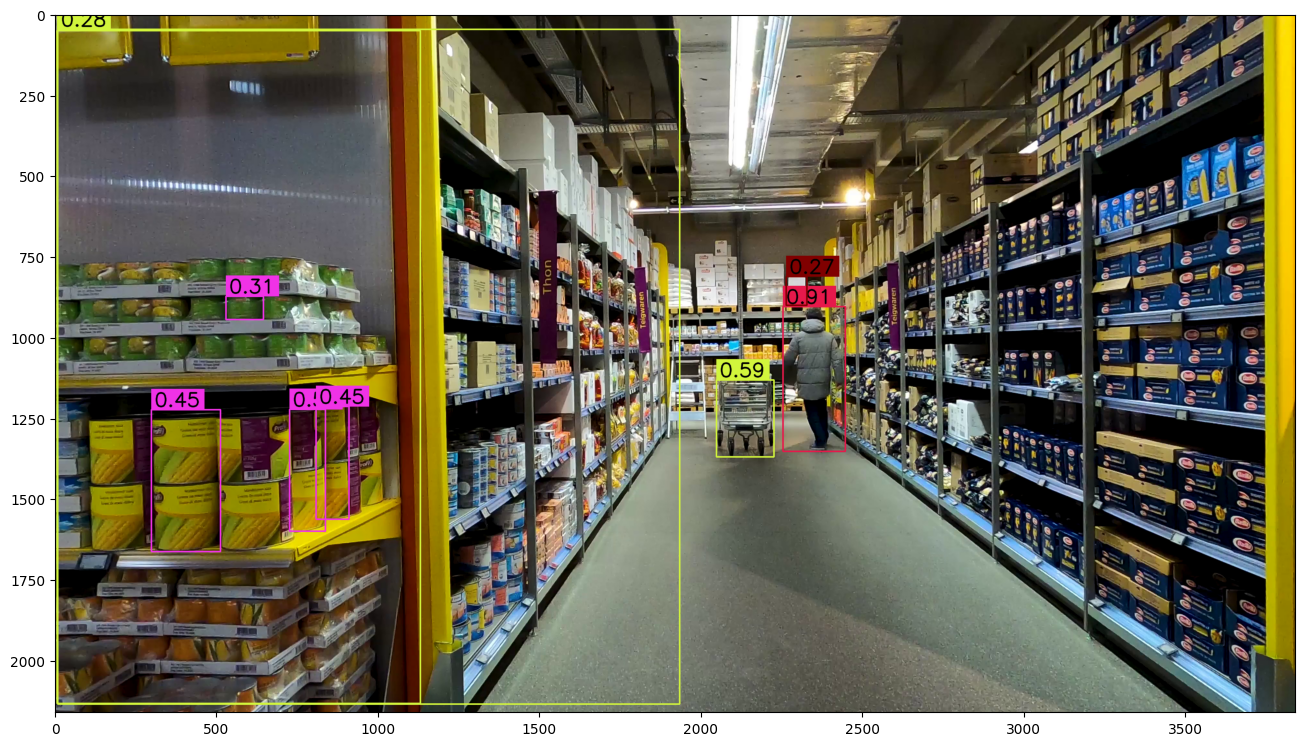

In [14]:
# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [15]:
results.boxes.cls

tensor([ 0., 56., 39., 39., 72., 39., 39., 72., 62.], device='cuda:0')

In [16]:
[model.model.names.get(i) for i in results.boxes.cls.cpu().numpy()]

['person',
 'chair',
 'bottle',
 'bottle',
 'refrigerator',
 'bottle',
 'bottle',
 'refrigerator',
 'tv']

#### Here we only need the person to count, so lets filter out the person


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 29.7ms
Speed: 8.0ms preprocess, 29.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


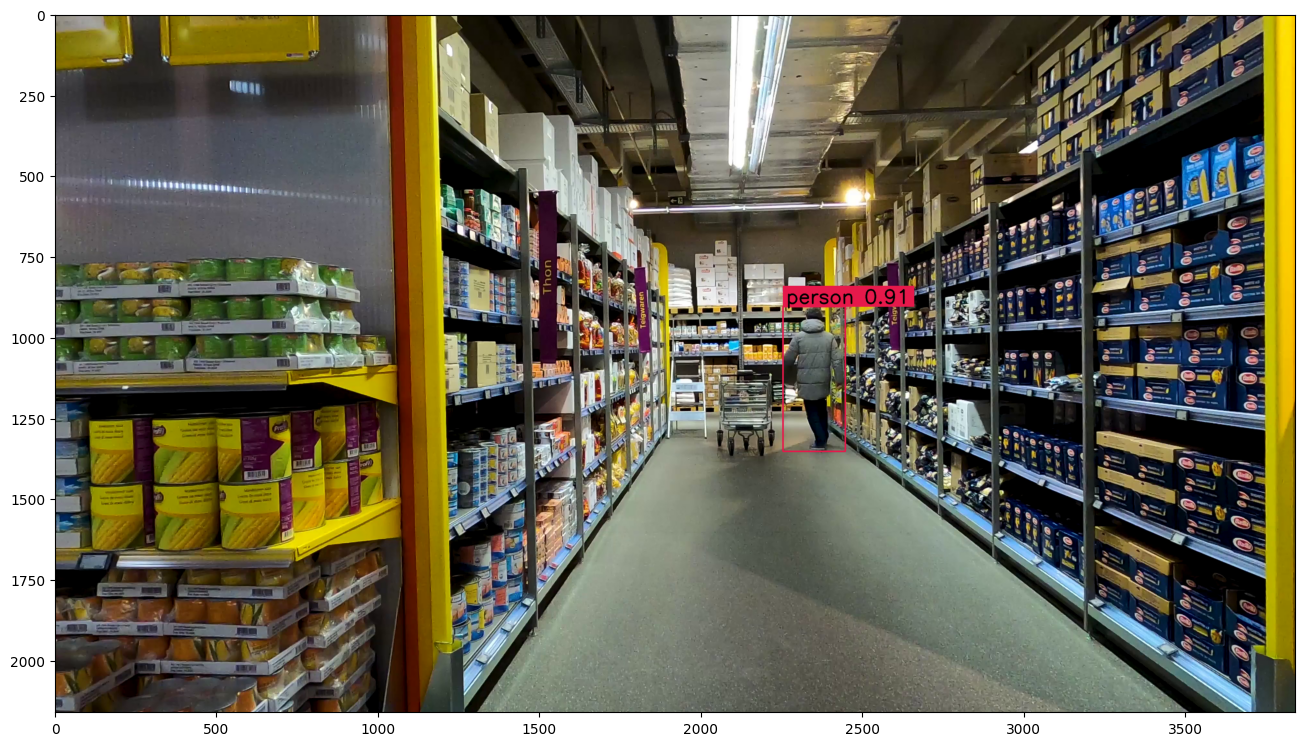

In [17]:
import numpy as np
# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
keys = [0]
detections = detections[np.array([i in keys for i in detections.class_id])]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [f'{model.names[class_id]} {conf:0.2f}' for _,conf,class_id,_ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections,labels=labels)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))


0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 29.7ms
Speed: 9.6ms preprocess, 29.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


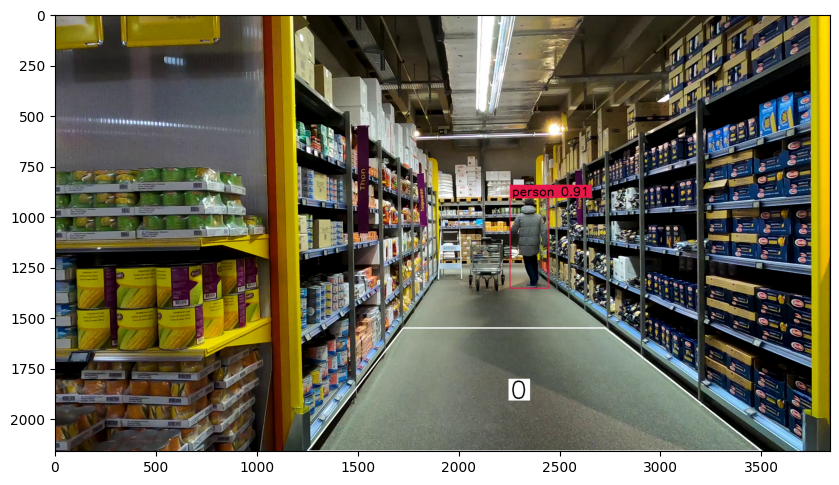

In [18]:
polygon = np.array([
    [1725, 1550],
    [2725, 1550],
    [3500, 2160],
    [1250, 2160]
])
video_info = sv.VideoInfo.from_video_path(MALL_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)

# extract video frame
generator = sv.get_video_frames_generator(MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (10, 10))

In [23]:

polygon = np.array([
    [1725, 1550],
    [2725, 1550],
    [3500, 2160],
    [1250, 2160]
])
vid_info = sv.video.VideoInfo.from_video_path(MALL_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon,frame_resolution_wh=vid_info.resolution_wh)

genrator = sv.get_video_frames_generator(source_path=MALL_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

zone_annotator = sv.PolygonZoneAnnotator(zone=zone,color=sv.Color.white(),thickness=6,text_scale=4)
box_annotator = sv.BoxAnnotator(text_thickness=4,thickness=4,text_scale=2)
def process_frame(frame: np.ndarray, _) -> np.ndarray:
  results = model(frame,imgsz=1280)[0]
  detections = sv.Detections.from_yolov8(yolov8_results=results)
  detections = detections[detections.class_id==0]
  zone.trigger(detections=detections)

  labels = [f'{model.names[id]} {conf:0.2f}' for _,conf,id,_ in detections]
  box_annotator.annotate(scene=frame,detections=detections,labels=labels)
  zone_annotator.annotate(scene=frame)
  return frame

sv.process_video(source_path=MALL_VIDEO_PATH, target_path=f"{HOME}/mall-result.mp4", callback=process_frame)

from IPython import display
display.clear_output()




0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 30.2ms
Speed: 8.8ms preprocess, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)

0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 29.6ms
Speed: 10.1ms preprocess, 29.6ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 736x1280 1 person, 3 bottles, 1 chair, 2 tvs, 2 refrigerators, 29.8ms
Speed: 9.9ms preprocess, 29.8ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)

0: 736x1280 1 person, 3 bottles, 1 chair, 2 tvs, 2 refrigerators, 29.6ms
Speed: 10.2ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)

0: 736x1280 1 person, 3 bottles, 1 chair, 2 refrigerators, 29.6ms
Speed: 10.6ms preprocess, 29.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)

0: 736x1280 1 person, 3 bottles, 1 chair, 1 tv, 2 refrigerators, 29.6ms
Speed: 10.8ms preprocess, 29.6ms inference, 2.0ms postprocess per im

KeyboardInterrupt: ignored

In [35]:
del vid_info,sv,frame,genrator,detections,zone,results

In [ ]:
import numpy as np
import supervision as sv
polygon = np.array([
    [200, 3840],
    [1300, 600],
    [1325, 600],
    [550, 3840]
])
vid_info = sv.video.VideoInfo.from_video_path(SUBWAY_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon,frame_resolution_wh=vid_info.resolution_wh)

genrator = sv.get_video_frames_generator(source_path=SUBWAY_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

zone_annotator = sv.PolygonZoneAnnotator(zone=zone,color=sv.Color.white(),thickness=6,text_scale=4)
box_annotator = sv.BoxAnnotator(text_thickness=4,thickness=4,text_scale=2)
def process_frame(frame: np.ndarray, _) -> np.ndarray:
  results = model(frame)[0]
  detections = sv.Detections.from_yolov8(results)
  detections = detections[detections.class_id==0]
  zone.trigger(detections=detections)

  #labels = [f'{model.names[id]} {conf:0.2f}' for _,conf,id,_ in detections]
  box_annotator.annotate(scene=frame,detections=detections,skip_label=True)
  zone_annotator.annotate(scene=frame)
  return frame

sv.process_video(source_path=SUBWAY_VIDEO_PATH,target_path=f"{HOME}/subway-result.mp4", callback=process_frame)

from IPython import display
display.clear_output()
#%matplotlib inline  
#sv.show_frame_in_notebook(frame, (10, 10))


0: 640x384 12 persons, 1 stop sign, 2 handbags, 65.8ms
Speed: 2.9ms preprocess, 65.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 15 persons, 1 stop sign, 2 handbags, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 15 persons, 1 stop sign, 3 handbags, 11.1ms
Speed: 3.1ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 16 persons, 1 stop sign, 2 handbags, 1 teddy bear, 11.1ms
Speed: 4.3ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 17 persons, 1 stop sign, 1 handbag, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 16 persons, 1 stop sign, 1 handbag, 11.0ms
Speed: 3.2ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x384 16 persons, 1 stop sign, 2 handbags, 11.0ms
Speed: 3.2ms p

In [ ]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [540,  985 ],
        [1620, 985 ],
        [2160, 1920],
        [1620, 2855],
        [540,  2855],
        [0,    1920]
    ], np.int32),
    np.array([
        [0,    1920],
        [540,  985 ],
        [0,    0   ]
    ], np.int32),
    np.array([
        [1620, 985 ],
        [2160, 1920],
        [2160,    0]
    ], np.int32),
    np.array([
        [540,  985 ],
        [0,    0   ],
        [2160, 0   ],
        [1620, 985 ]
    ], np.int32),
    np.array([
        [0,    1920],
        [0,    3840],
        [540,  2855]
    ], np.int32),
    np.array([
        [2160, 1920],
        [1620, 2855],
        [2160, 3840]
    ], np.int32),
    np.array([
        [1620, 2855],
        [540,  2855],
        [0,    3840],
        [2160, 3840]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(MARKET_SQUARE_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=6,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]

# extract video frame
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
    frame = zone_annotator.annotate(scene=frame)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))